# Backpropagation report

Comparison between tensorflow and DIY neural network versions at the non-linear binary classification task.

In [1]:
from datetime import datetime
from itertools import product
from typing import Optional, Callable

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, auc
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from neural_network import NeuralNetwork

plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['pcolor.shading'] = 'auto'

## The data

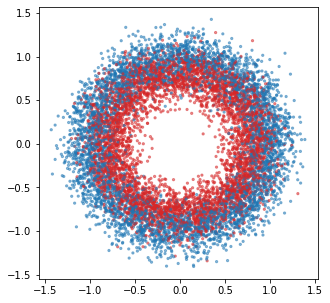

In [2]:
x, y = make_circles(n_samples=10000, noise=0.15)

colors = ['C0' if i == 0 else 'C3' for i in y]

plt.scatter(*x.T, color=colors, s=5, alpha=0.5)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

x_train.shape, y_train.shape

((7500, 2), (7500,))

## Evaluation utils

In [4]:
def evaluate_model(predictor: Callable[[np.ndarray], np.ndarray]):
    y_pred = predictor(x_test).flatten()
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    plt.plot(recall, precision)
    plt.plot([0, 1], [1, 0], ls='dashed')
    plt.title('Precision-recall curve')
    plt.xlabel('recall')
    plt.ylabel('precision')
    
    plt.show()
    plt.close()
    
    acc = accuracy_score(y_test, y_pred > 0.5)
    f1 = (2 * precision * recall / (precision + recall)).max()
    prauc = auc(recall, precision)

    print('Accuracy:', round(acc, 4))
    print('F1:      ', round(f1, 4))
    print('PR-AUC:  ', round(prauc, 4))

In [5]:
grid_x, grid_y = np.linspace(x.min(axis=0), x.max(axis=0), 500).T
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

grid = np.vstack([grid_x.flatten(), grid_y.flatten()]).T

grid.shape

(250000, 2)

In [6]:
cmap = LinearSegmentedColormap.from_list('cmap', ['C0', 'white', 'C3'])

In [7]:
def plot_probabilities(
        predictor: Callable[[np.ndarray], np.ndarray],
        plot_data: bool = False,
):
    grid_pred = predictor(grid).reshape(grid_x.shape)
    diff = np.abs(np.array([grid_pred.max(), grid_pred.min()]) - 0.5).max()
    vmin = 0.5 - diff
    vmax = 0.5 + diff

    plt.pcolormesh(grid_x, grid_y, grid_pred, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar()
    
    if plot_data:
        plt.scatter(*x.T, color=colors, s=5, alpha=0.75)
        
    plt.show()
    plt.close()

## Evaluation

### Tensorflow

Epoch 1/25
7500/7500 [==============================] - 8s 948us/step - loss: 0.6959 - accuracy: 0.5036 - val_loss: 0.7052 - val_accuracy: 0.4992
Epoch 2/25
7500/7500 [==============================] - 7s 895us/step - loss: 0.6974 - accuracy: 0.4858 - val_loss: 0.6973 - val_accuracy: 0.5008
Epoch 3/25
7500/7500 [==============================] - 7s 921us/step - loss: 0.6949 - accuracy: 0.5087 - val_loss: 0.7012 - val_accuracy: 0.4992
Epoch 4/25
7500/7500 [==============================] - 7s 946us/step - loss: 0.6961 - accuracy: 0.4982 - val_loss: 0.6947 - val_accuracy: 0.4992
Epoch 5/25
7500/7500 [==============================] - 7s 968us/step - loss: 0.6946 - accuracy: 0.5026 - val_loss: 0.6939 - val_accuracy: 0.5008
Epoch 6/25
7500/7500 [==============================] - 7s 955us/step - loss: 0.6947 - accuracy: 0.5024 - val_loss: 0.6923 - val_accuracy: 0.5240
Epoch 7/25
7500/7500 [==============================] - 7s 962us/step - loss: 0.6928 - accuracy: 0.5217 - val_loss: 0.6944 -

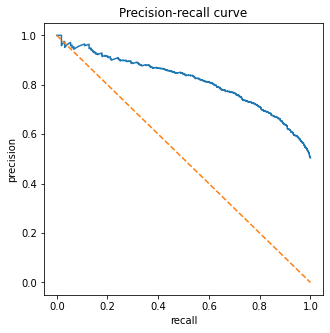

Accuracy: 0.744
F1:       0.756
PR-AUC:   0.8146


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((x_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

t1 = datetime.now()

model.fit(x_train, y_train, epochs=25, batch_size=1, validation_data=(x_test, y_test))

t2 = datetime.now()
print('\nTraining time:', t2 - t1)

evaluate_model(model.predict)

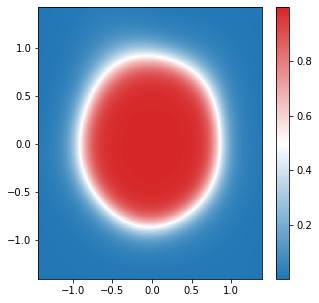

In [9]:
plot_probabilities(model.predict)

### DIY neural net

Epoch 1 : loss 0.6939, acc 0.4997, val loss 0.6939, val acc 0.4997
Epoch 2 : loss 0.6952, acc 0.5003, val loss 0.6952, val acc 0.5003
Epoch 3 : loss 0.6944, acc 0.5003, val loss 0.6944, val acc 0.5003
Epoch 4 : loss 0.6839, acc 0.5915, val loss 0.6839, val acc 0.5915
Epoch 5 : loss 0.6750, acc 0.6025, val loss 0.6750, val acc 0.6025
Epoch 6 : loss 0.6687, acc 0.6085, val loss 0.6687, val acc 0.6085
Epoch 7 : loss 0.6596, acc 0.5999, val loss 0.6596, val acc 0.5999
Epoch 8 : loss 0.6456, acc 0.6235, val loss 0.6456, val acc 0.6235
Epoch 9 : loss 0.5965, acc 0.6983, val loss 0.5965, val acc 0.6983
Epoch 10: loss 0.5472, acc 0.7256, val loss 0.5472, val acc 0.7256
Epoch 11: loss 0.5386, acc 0.7257, val loss 0.5386, val acc 0.7257
Epoch 12: loss 0.5338, acc 0.7293, val loss 0.5338, val acc 0.7293
Epoch 13: loss 0.5323, acc 0.7315, val loss 0.5323, val acc 0.7315
Epoch 14: loss 0.5360, acc 0.7308, val loss 0.5360, val acc 0.7308
Epoch 15: loss 0.5317, acc 0.7317, val loss 0.5317, val acc 0.

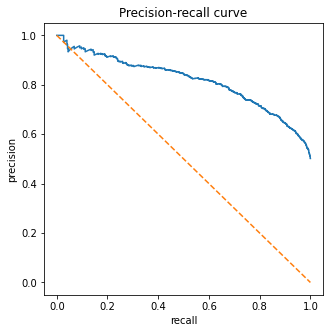

Accuracy: 0.7476
F1:       0.7605
PR-AUC:   0.8169


In [12]:
layer_sizes = np.array([x_train.shape[1], 16, 16, 16, 1])

nn = NeuralNetwork(layer_sizes).compile()

t1 = datetime.now()

nn.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

t2 = datetime.now()
print('\nTraining time:', t2 - t1)

evaluate_model(nn.predict)

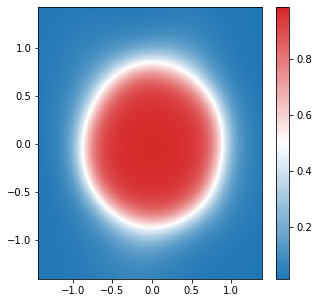

In [13]:
plot_probabilities(nn.predict)